<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149039 entries, 0 to 149038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  149039 non-null  object 
 1   BASCH      139949 non-null  float64
 2   BONAP      136493 non-null  float64
 3   PA18       142259 non-null  float64
 4   VERS       143813 non-null  float64
dtypes: float64(4), object(1)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149039 entries, 0 to 149038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  149039 non-null  datetime64[ns]
 1   BASCH      139949 non-null  float64       
 2   BONAP      136493 non-null  float64       
 3   PA18       142259 non-null  float64       
 4   VERS       143813 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.7 MB


<Axes: xlabel='timestamp'>

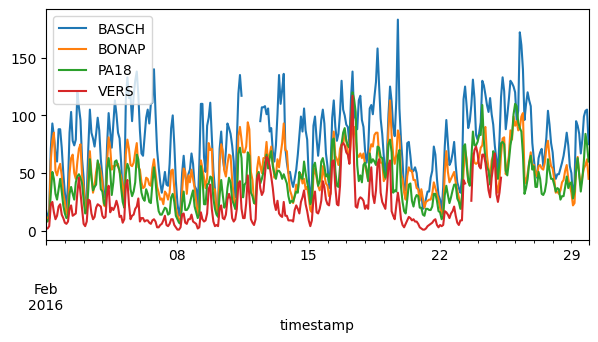

In [4]:
# %% [markdown]
# Tema 9

# %% [code]
import pandas as pd

# %% [code]
air = pd.read_csv("/content/airquality.csv",sep=";",skiprows=[1], na_values=["n/d"])

# %% [code]
air.info()

# %% [code]
air.head()

# %% [code]
# Convertimos la columna timestamp de tipo object a tipo datetime
air.timestamp = pd.to_datetime(air.timestamp)

# %% [code]
air.info()

# %% [code]
air.head()

# %% [code]
# acceso a las horas
air.timestamp.dt.hour

# %% [code]
# Acceso al numero de semana
air.timestamp.dt.isocalendar().week

# %% [code]
air.timestamp.dt.weekday

# %% [code]
air.head()

# %% [code]
# Vamos ajuste de index

air.index = air.timestamp

# %% [code]
air

# %% [code]
air = air.drop("timestamp", axis=1)

# %% [code]
air

# %% [code]
ts = air.index[10000]

# %% [code]
ts

# %% [code]
ts.year

# %% [code]
ts.month

# %% [code]
ts.isocalendar().week

# %% [code]
ts.weekday()

# %% [code]
# aplicando una mascara

air[air.index.month == 5].head()

# %% [code]
#filtando los datos en un rango de horas

air[(air.index.hour>=18) | (air.index.hour<=3)].head()

# %% [code]
# Selecionando year y horas
air[(air.index.year >= 2005) & (air.index.hour >= 18)].head()

# %% [code]
import matplotlib.pyplot as plt

# %% [code]
fig, axes = plt.subplots(figsize=(7,3), dpi=100)
air[(air.index.month == 2) & (air.index.year > 2015)].resample("2h").max().plot(ax=axes)

# %% [markdown]

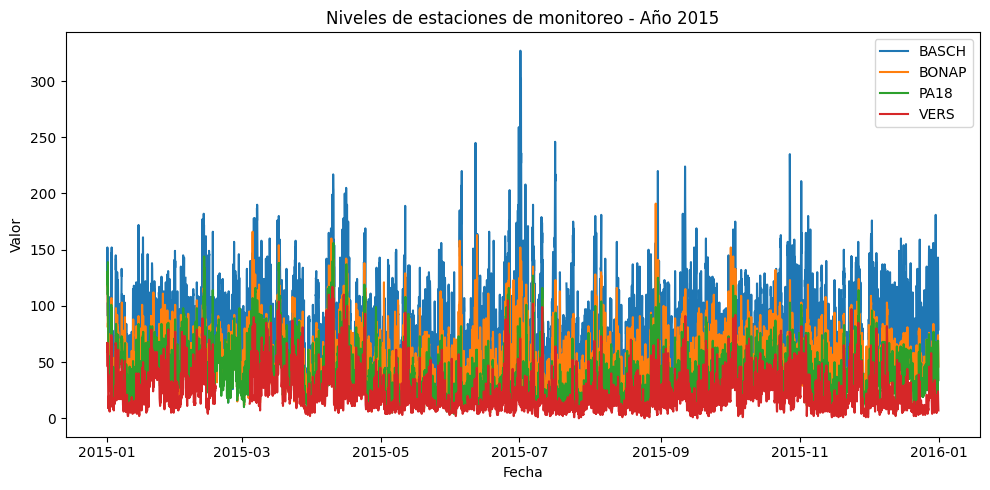

In [5]:
import matplotlib.pyplot as plt

# Filtrar datos del año 2015
air_2015 = air[air.index.year == 2015]

# Crear gráfico
plt.figure(figsize=(10, 5))
plt.plot(air_2015.index, air_2015['BASCH'], label='BASCH')
plt.plot(air_2015.index, air_2015['BONAP'], label='BONAP')
plt.plot(air_2015.index, air_2015['PA18'], label='PA18')
plt.plot(air_2015.index, air_2015['VERS'], label='VERS')

plt.title('Niveles de estaciones de monitoreo - Año 2015')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-6-755684397.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  promedios_mensuales = air_2015.resample('M').mean()


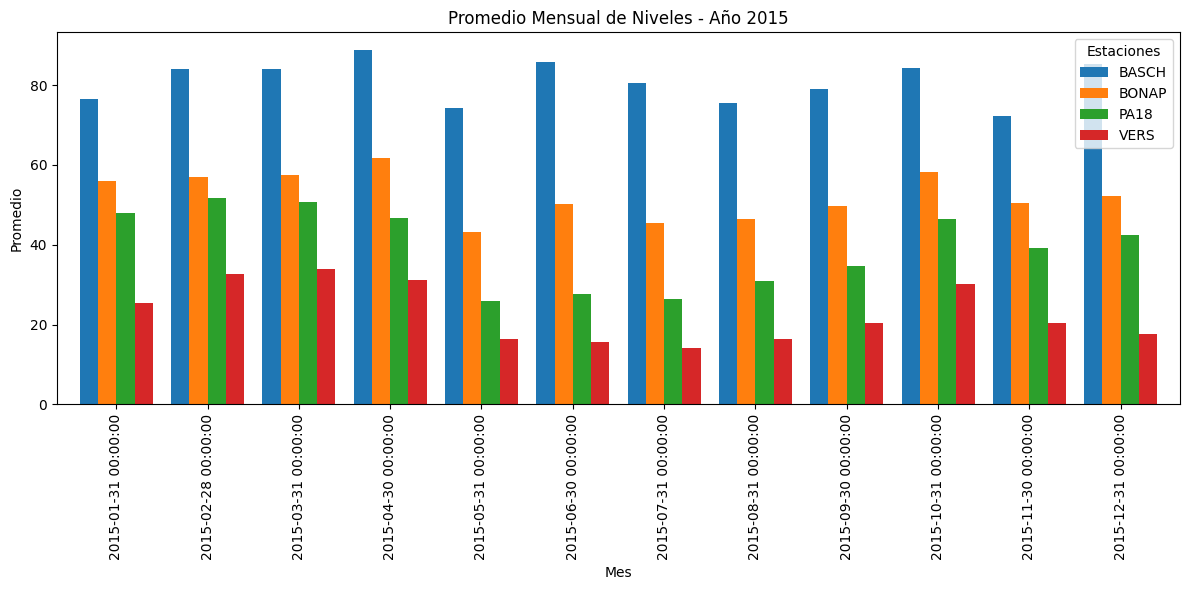

In [6]:
# Calcular promedio mensual
promedios_mensuales = air_2015.resample('M').mean()

# Crear gráfico de barras agrupadas
promedios_mensuales.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('Promedio Mensual de Niveles - Año 2015')
plt.xlabel('Mes')
plt.ylabel('Promedio')
plt.legend(title='Estaciones')
plt.tight_layout()
plt.show()

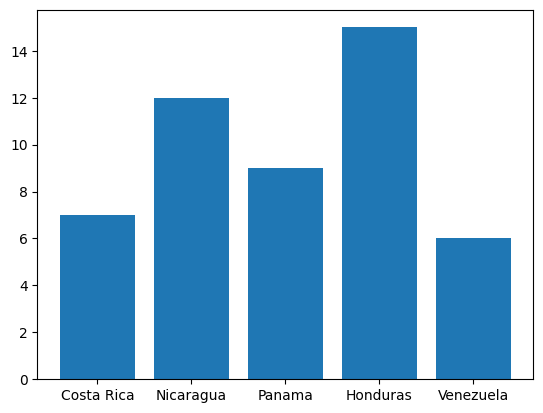

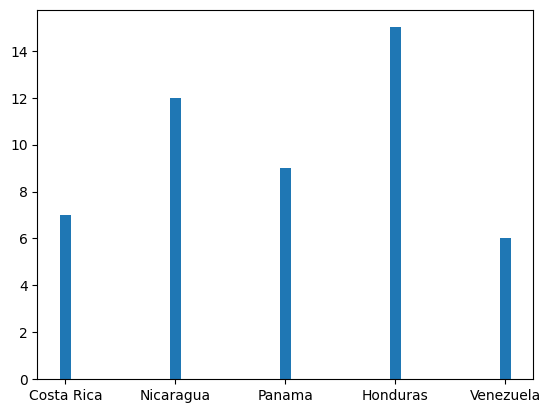

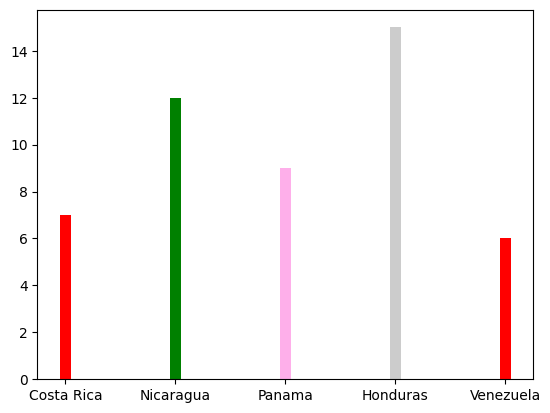

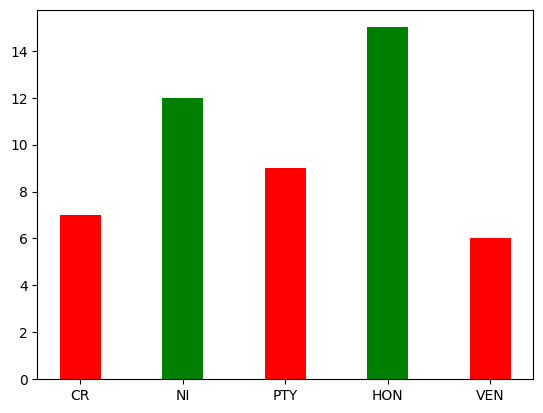

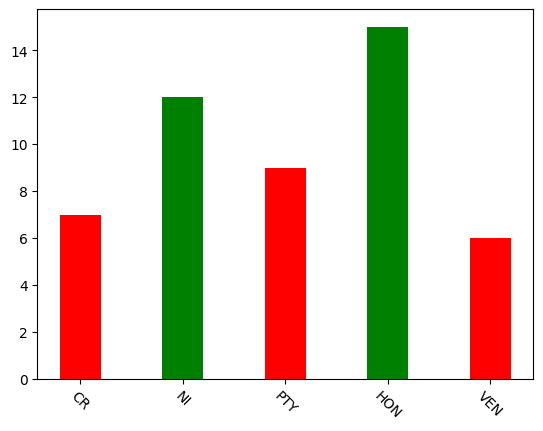

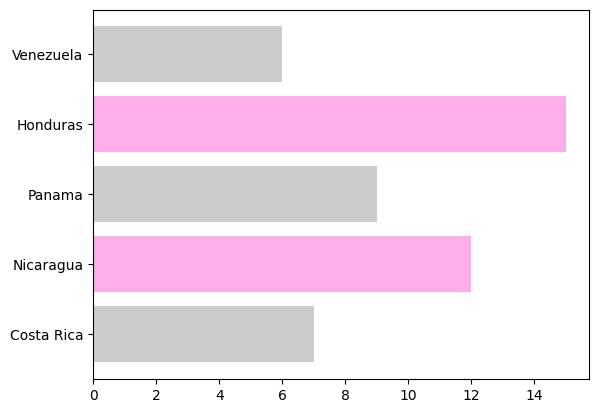

[5 7 4 1 1 3 9 3 2 1]


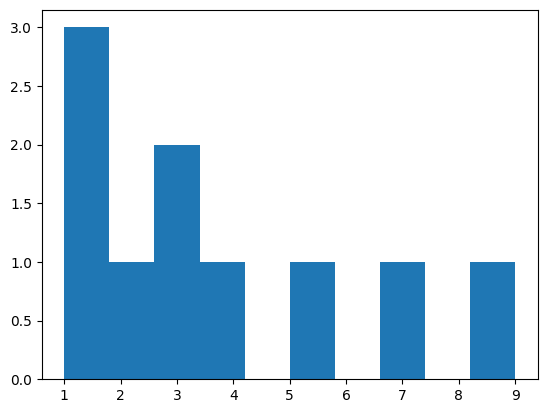

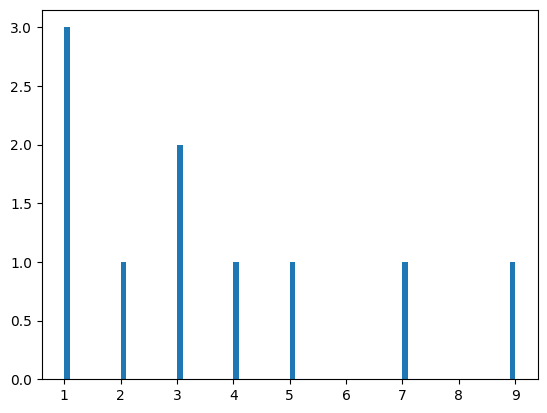

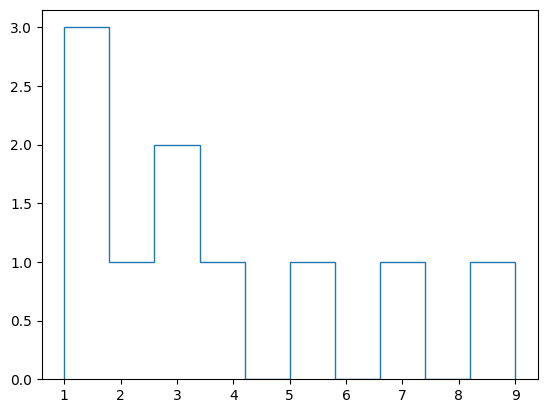

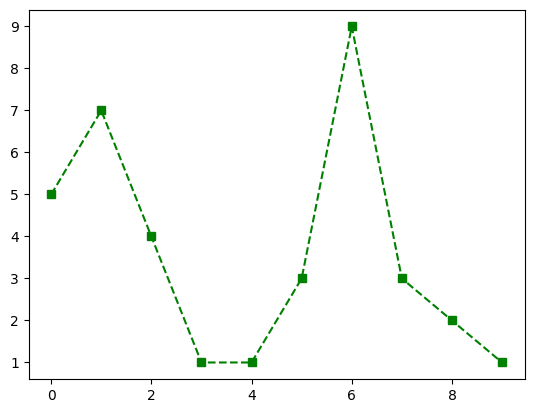

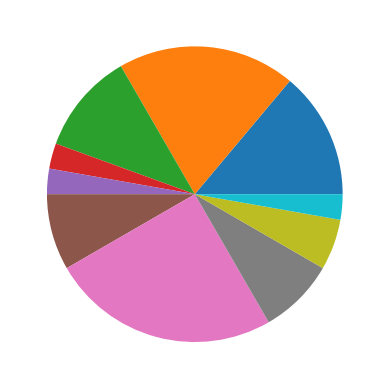

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


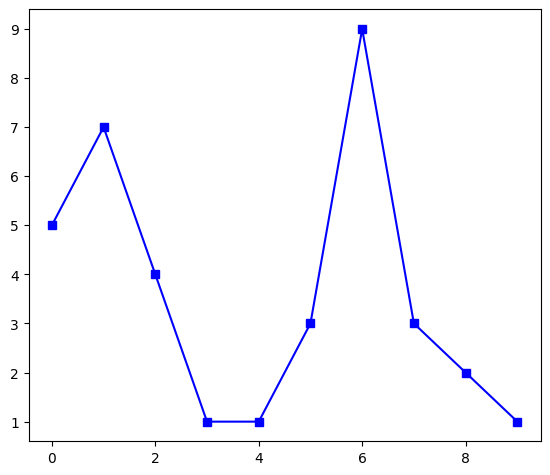

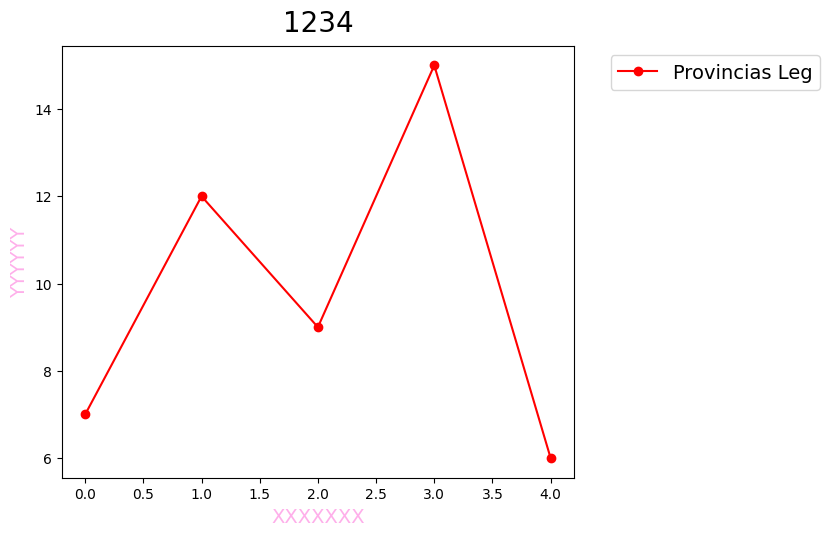

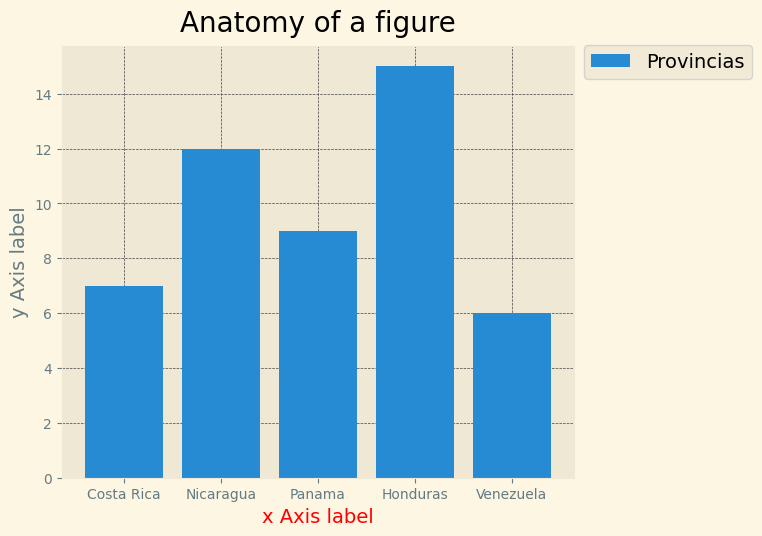

In [8]:
# %% [markdown]
# Tema 10 - Graficos simples


# %% [code]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %% [code]
# Definimos dos listados de valores

paises = ["Costa Rica","Nicaragua","Panama","Honduras","Venezuela"]
provincias = [7,12,9,15,6]

# %% [code]
# Grafico de Barras
plt.bar(paises,provincias)
plt.show()

# %% [code]
# Grafico de Barras
plt.bar(paises,provincias,width=0.1)
plt.show()

# %% [code]
# Grafico de Barras
plt.bar(paises,provincias,width=0.1,color=['red','green',"#feafea","#ccc"])
plt.show()

# %% [code]
# Agregamos

plt.bar(paises,provincias,width=0.4,color=['red','green'])
plt.xticks(np.arange(5),("CR","NI","PTY","HON","VEN"))
plt.show()

# %% [code]
# Agregamos el parametro para el color

plt.bar(paises,provincias,width=0.4,color=['red','green'])
plt.xticks(np.arange(5),("CR","NI","PTY","HON","VEN"),rotation=-45)
plt.show()

# %% [code]
# Cambiamos a un grafico horizontal

plt.barh(paises,provincias,color=['#ccc','#feafea'])
plt.show()

# %% [markdown]
# Grafico Histograma

# %% [code]
# Creamos unos datos aletorios

data = np.random.randint(1,10,10)
print(data)

# %% [code]
plt.hist(data)
plt.show()

# %% [code]
plt.hist(data,bins=80)
plt.show()

# %% [code]
plt.hist(data,histtype="step")
plt.show()

# %% [code]
# Grafico de Lineas
plt.plot(data,"gs--")
plt.show()

# %% [code]
# Pie

plt.pie(data)
plt.show()

# %% [markdown]
## Graficos Complejos

# %% [code]
# Crear un Grafico como objeto

fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.9])
axes.plot(data,"bs-")
fig.show()

# %% [code]
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.9])
axes.set_title("1234", fontsize=20, verticalalignment='bottom')
axes.set_xlabel("XXXXXXX", fontsize=14,color='#feafea')
axes.set_ylabel("YYYYYY", fontsize=14,color='#feafea')
axes.plot(provincias,"ro-",label="Provincias Leg")
axes.legend(loc="upper right", fontsize=14,bbox_to_anchor=(1.5,1.0))
fig.show()

# %% [code]
# Colores y Estilos

# %% [code]
print(plt.style.available)

# %% [code]
plt.style.use('Solarize_Light2')
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.9])
axes.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
axes.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
axes.set_xlabel("x Axis label", fontsize=14,color='red')
axes.set_ylabel("y Axis label", fontsize=14)
axes.bar(paises,provincias,label="Provincias")
axes.legend(loc="lower left", fontsize=14,bbox_to_anchor=(1.0,0.9))
fig.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo titanic.csv
df = pd.read_csv('/content/titanic.csv')

# Mostrar las primeras filas para conocer el contenido
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


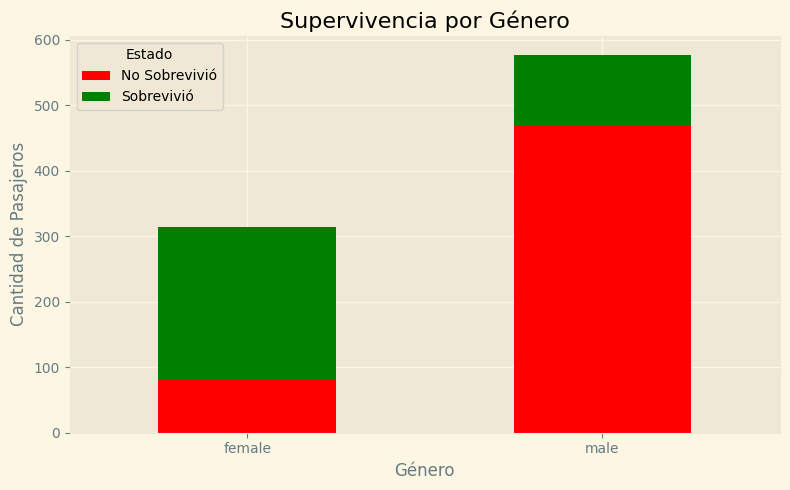

In [16]:
# Agrupar por género y supervivencia
survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()

# Gráfico de barras
survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 5))
plt.title("Supervivencia por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de Pasajeros")
plt.legend(['No Sobrevivió', 'Sobrevivió'], title='Estado')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

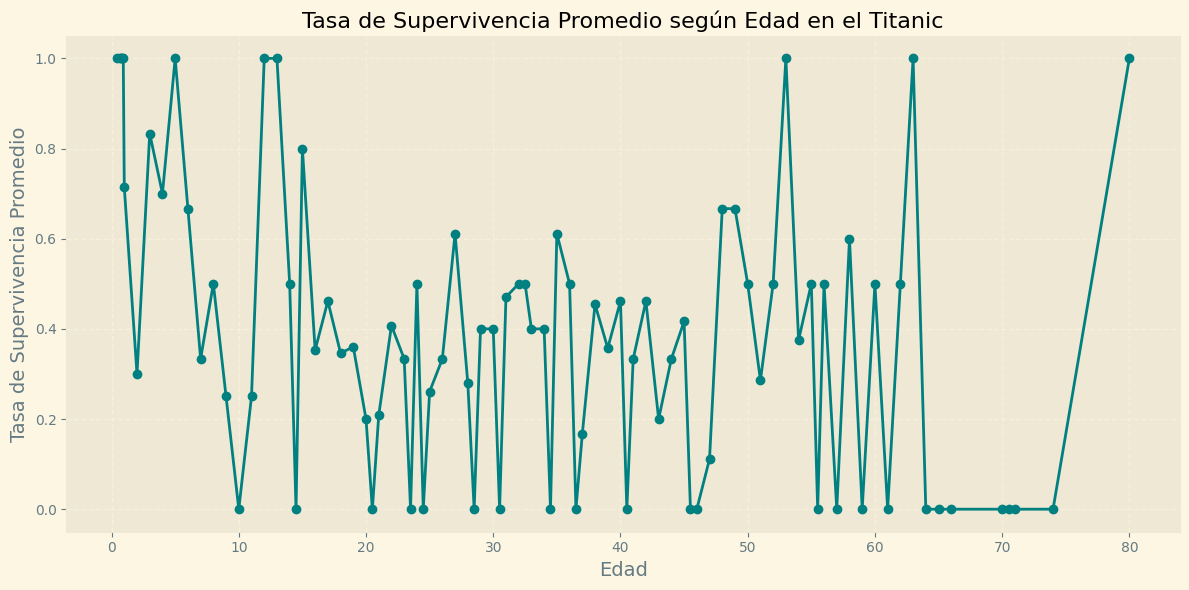

In [19]:
# Eliminar filas sin edad o supervivencia
df_clean = df[['Age', 'Survived']].dropna()

# Agrupar por edad y calcular la tasa promedio de supervivencia
survival_rate_by_age = df_clean.groupby('Age')['Survived'].mean()

# Crear gráfico
plt.figure(figsize=(12, 6))
plt.plot(survival_rate_by_age.index, survival_rate_by_age.values, 'o-', color='teal', linewidth=2)

# Títulos y etiquetas
plt.title('Tasa de Supervivencia Promedio según Edad en el Titanic', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Tasa de Supervivencia Promedio', fontsize=14)

# Mostrar cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd

# DataFrames originales
empleados = pd.DataFrame({
    'empleado_id': [1, 2, 3, 4, 5],
    'nombre': ['Ana', 'Luis', 'Carlos', 'Marta', 'Sofía'],
    'departamento': ['Ventas', 'Marketing', 'Finanzas', 'Ventas', 'Recursos Humanos']
})

salarios = pd.DataFrame({
    'empleado_id': [1, 2, 3, 6],
    'salario': [50000, 60000, 55000, 70000],
    'fecha_pago': ['2024-07-01', '2024-07-15', '2024-07-30', '2024-08-05']
})

# Unión de DataFrames con merge
resultado = pd.merge(empleados, salarios, on='empleado_id', how='inner')

print(resultado)

   empleado_id  nombre departamento  salario  fecha_pago
0            1     Ana       Ventas    50000  2024-07-01
1            2    Luis    Marketing    60000  2024-07-15
2            3  Carlos     Finanzas    55000  2024-07-30


In [21]:
import folium

# Coordenadas de los 3 lugares:
puntos = [
    {
        'nombre': 'Parque Juan Santamaría',
        'ubicacion': [10.0199, -84.2121]  # Alajuela
    },
    {
        'nombre': 'Mall Paseo de las Flores',
        'ubicacion': [9.9983, -84.1178]   # Heredia
    },
    {
        'nombre': 'Basílica de Cartago',
        'ubicacion': [9.8644, -83.9235]   # Cartago
    }
]

# Crear el mapa centrado en Costa Rica
m = folium.Map(location=[9.9, -84.1], zoom_start=10)

# Agregar los marcadores
for punto in puntos:
    folium.Marker(
        location=punto['ubicacion'],
        popup=punto['nombre'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Mostrar el mapa
m
